In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns
import os

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
api_dir = os.path.dirname(os.path.dirname(os.path.realpath('api_keys.json')))
file_name = os.path.join(api_dir, "api_keys.json")
data = json.load(open(file_name))

consumer_key = data['twitter_consumer_key']
consumer_secret = data['twitter_consumer_secret']
access_token = data['twitter_access_token']
access_token_secret = data['twitter_access_token_secret']

In [4]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [5]:
target_terms = ("@BBC","@CBS", "@CNN", "@FoxNews", "@nytimes")
sentiments = []
oldest_tweet = ""

for target in target_terms:
    counter = 1
    
    for x in range(5):
        public_tweets = api.user_timeline(target, page=x)
        
        for tweet in public_tweets:
        
            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet['text'])["compound"]
            pos = analyzer.polarity_scores(tweet['text'])["pos"]
            neu = analyzer.polarity_scores(tweet['text'])["neu"]
            neg = analyzer.polarity_scores(tweet['text'])["neg"]
        
            # Add sentiments for each tweet into an array
            sentiments.append({"Date": tweet["created_at"],
                           "Text": tweet["text"],
                            "News Org": tweet['user']['name'],
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                            "Tweets Ago": counter})
            counter = counter + 1
            oldest_tweet = tweet["id_str"]

In [6]:
sentiments_df = pd.DataFrame.from_dict(sentiments)

In [7]:
df_bbc=sentiments_df.loc[sentiments_df['News Org']=='BBC']
df_cbs=sentiments_df.loc[sentiments_df['News Org']=='CBS']
df_cnn=sentiments_df.loc[sentiments_df['News Org']=='CNN']
df_fox=sentiments_df.loc[sentiments_df['News Org']=='Fox News']
df_nyt=sentiments_df.loc[sentiments_df['News Org']=='The New York Times']

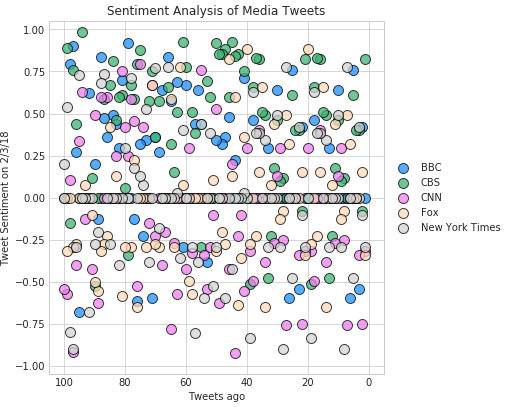

In [17]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 6.5))
    plt.xlim(105, -5)
    plt.xlabel("Tweets ago")
    plt.ylim(-1.05, 1.05) 
    plt.ylabel("Tweet Sentiment on 2/3/18")
    plt.scatter(df_bbc['Tweets Ago'], df_bbc['Compound'],  s = 100, color = 'dodgerblue', label = 'BBC', edgecolors='k', alpha=0.75)
    plt.scatter(df_cbs['Tweets Ago'], df_cbs['Compound'],  s = 100,color = 'mediumseagreen', label = 'CBS', edgecolors='k', alpha=0.75)
    plt.scatter(df_cnn['Tweets Ago'], df_cnn['Compound'],  s = 100,color = 'violet', label = 'CNN', edgecolors='k', alpha=0.75)
    plt.scatter(df_fox['Tweets Ago'], df_fox['Compound'],  s = 100,color = 'peachpuff', label = 'Fox', edgecolors='k', alpha=0.75)
    plt.scatter(df_nyt['Tweets Ago'], df_nyt['Compound'],  s = 100,color = 'lightgrey', label = 'New York Times', edgecolors='k', alpha=0.75)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('Sentiment Analysis of Media Tweets')
    plt.savefig('sentimentscatter.png')

plt.show()

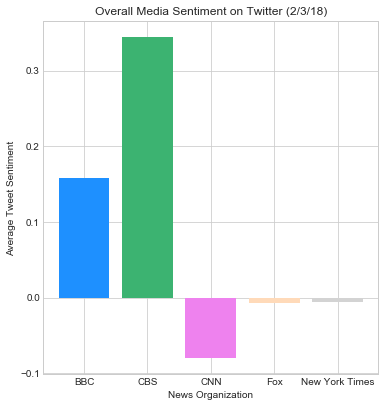

In [18]:
 datas = [{'label':'BBC', 'color': 'dodgerblue', 'height': df_bbc['Compound'].mean()},
    {'label':'CBS', 'color': 'mediumseagreen', 'height': df_cbs['Compound'].mean()},
    {'label':'CNN', 'color': 'violet', 'height': df_cnn['Compound'].mean()},
    {'label':'Fox', 'color': 'peachpuff', 'height': df_fox['Compound'].mean()},
    {'label':'New York Times', 'color': 'lightgrey', 'height': df_nyt['Compound'].mean()}]
labels = [data['label'] for data in datas]
pos = [i for i in range(len(datas)) ]
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 6.5))


    i = 0
    for data in datas:
        plt.bar(i, data['height'], align='center',color=data['color'])
        i += 1 
    plt.title("Overall Media Sentiment on Twitter (2/3/18)")
    plt.ylabel("Average Tweet Sentiment")
    plt.xlabel("News Organization")
    plt.xticks(pos, labels)
    plt.savefig('sentimentbar.png')

    plt.show()    

The majority of tweets from the news organizations in this analysis are of neutral sentiment. This is true for all five organizations as demonstrated by the scatter plot.

According to the bar chart, CBS is overwhelmingly the most positive in tweet sentiment. However, their average is only .35 which is still considered neutral in the context of VADER.

The bar chart also shows that CNN is the most negative news organization based on this time period. The mean sentiment for CNN is only -.08 which is still considered neutral.

The scatter plot shows that there is not a strong difference between organizations tweet sentiments. They all do, however, appear to send more tweets considered positive than negative.